In [68]:
import pandas as pd
import csv
import numpy as np
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [69]:
DIR='../Data1/'
weatherDF = pd.read_csv(DIR+'daegu_utf8.csv')
print(weatherDF.head())

           날짜   지점  평균기온  최저기온  최고기온
0  1909-01-01  143  -4.1  -8.0   0.1
1  1909-01-02  143  -0.8  -6.7   6.1
2  1909-01-03  143   1.0  -2.4   3.6
3  1909-01-04  143   4.2   0.0   9.2
4  1909-01-05  143   3.4  -0.4   9.0


In [70]:
weatherDF['날짜'] = pd.to_datetime(weatherDF['날짜'])

In [71]:
weatherDF

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [75]:
system_name = platform.system()
if system_name == 'Windows':
    print('Windows OS')
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    print('Mac OS')
    plt.rc('font', family= 'AppleGothic')
elif system_name == 'Linux':
    print('Linux OS')
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print('Not Support')

Windows OS


시작 연도를 입력하세요:2010
마지막 연도를 입력하세요:2021
기온 변화를 측정할 달을 입력하세요:12


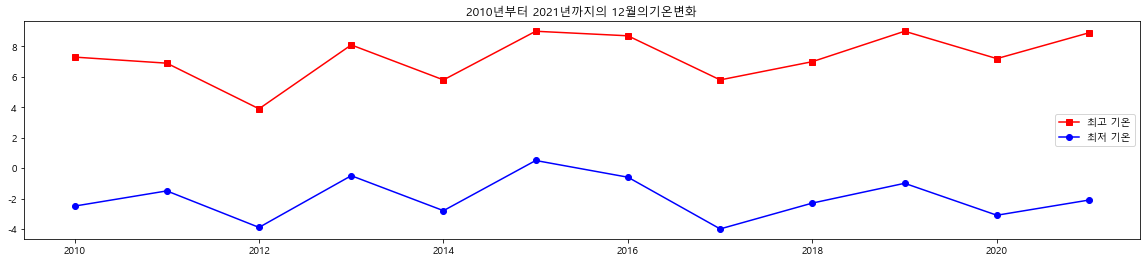

In [82]:
firstyear=int(input("시작 연도를 입력하세요:"))
lastyear=int(input("마지막 연도를 입력하세요:"))
weatherchange=int(input("기온 변화를 측정할 달을 입력하세요:"))

yearplus=weatherDF[(weatherDF['날짜'].dt.year >= firstyear) & 
                   (weatherDF['날짜'].dt.year <= lastyear) & 
                   (weatherDF['날짜'].dt.month == weatherchange)]

yearmean= yearplus.groupby(weatherDF['날짜'].dt.year).mean()

yearmax = round(yearmean['최고기온'], 1)
yearmin = round(yearmean['최저기온'], 1)

yearmax1 = yearmax.to_list()
yearmin1 = yearmin.to_list()


plt.figure(figsize=(20,4))
plt.rcParams['axes.unicode_minus'] = False
plt.plot(yearmax, label='최고 기온', marker='s', color='r')
plt.plot(yearmin, label='최저 기온', marker='o', color='b')
plt.title(f'{firstyear}년부터 {lastyear}년까지의 {weatherchange}월의기온변화')
plt.legend(loc=0)
plt.show()